In [1]:
import numpy as np
import scipy.linalg as la
import hamiltonian as hm
%matplotlib inline
import matplotlib.pyplot as plt

In [151]:
L = 5
H = hm.sparse_H(L)
vals, vecs = la.eigh(H)

In [152]:
Z = np.zeros((2**L,2**L))
for i in range(L):
    Zi = 1
    for j in range(L):
        if (j==i): Zi = np.kron(Zi,hm.Z)
        else: Zi = np.kron(Zi,hm.I)
    Z += Zi

X = np.zeros((2**L,2**L))
for i in range(L):
    Xi = 1
    for j in range(L):
        if (j==i): Xi = np.kron(Xi,hm.X)
        else: Xi = np.kron(Xi,hm.I)
    X += Xi

Y = np.zeros((2**L,2**L), dtype=complex)
for i in range(L):
    Yi = 1
    for j in range(L):
        if (j==i): Yi = np.kron(Yi,hm.Y)
        else: Yi = np.kron(Yi,hm.I)
    Y += Yi
    
# print(Z@Z)
# vals, vecs = la.eigh(Z)
# print(vals)
    
S2 = X@X + Y@Y + Z@Z
vals2, _ = la.eigh(S2)
# print(hm.chop(S2))
print(hm.chop(vals2))
print(hm.chop(np.sqrt(vals2+1)-1)/2)

[ 3  3  3  3  3  3  3  3  3  3 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 35 35 35 35 35 35]
[ 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  1.5  1.5  1.5  1.5  1.5
  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  2.5  2.5  2.5  2.5
  2.5  2.5]


In [157]:
# eigs of H
valsH, vecsH = la.eigh(H)
for i, vec in enumerate(vecsH.T):
    a = (H@vec)
    a = a[np.absolute(vec) > .0001]
    a = a/vec[np.absolute(vec) > .0001]
#     if np.all(np.isclose(a[0], a)): print("H:", a[0])
#     else: print("not an eig of H")
#     print("should be", valsH[i], '\n')

In [172]:
# expectations of Z in eigs of H
valsH, vecsH = la.eigh(H)
Zs = []
for i, vec in enumerate(vecsH.T):
    a = (Z@vec)
    a = a[np.absolute(vec) > .0001]
    a = a/vec[np.absolute(vec) > .0001]
    if np.all(np.isclose(a[0], a)): 
        print("Z:", a[0])
        Zs.append(a[0])
    else: 
        print("not an eig of Z", a[0], vec[np.absolute(vec) > .0001][np.argmax(np.absolute(a - a[0]))])
        Zs.append(None)
#     print("should be", valsX[i], '\n')

not an eig of Z (1-0j) (0.201850725583+0.0302675080896j)
not an eig of Z (1+0j) (0.00258438087645+0.000387527807287j)
not an eig of Z (-1-0j) (0.0971649552771-0.374911741616j)
not an eig of Z (1+0j) (0.00174886689924+0.000206520340168j)
not an eig of Z (1+0j) (-0.000219899449006-0.00033022258851j)
Z: (3+0j)
not an eig of Z (1-0j) (-0.00378539442432-0.00388993546564j)
not an eig of Z (1+0j) (-0.201289629358-0.206848634604j)
not an eig of Z (1-0j) (-0.398375177237-0.107781585398j)
not an eig of Z (1+5.78605256474e-18j) (-0.272474031328-0.0737186570708j)
not an eig of Z (1-0j) (-0.0018841457852-0.000509761228743j)
Z: (3-0j)
not an eig of Z (1+0j) (-0.00752534816927-4.89468909288e-05j)
not an eig of Z (1+0j) (-0.115808086937-0.0641535967723j)
not an eig of Z (1-0j) (-0.215694452696-0.0222067681645j)
Z: (5+0j)
Z: (-5+0j)
not an eig of Z (1+0j) (-0.362362456974+0.0639715876544j)
Z: (3-0j)
not an eig of Z (1-0j) (-0.000133894063596-1.02778506083e-05j)
not an eig of Z (1-0j) (-0.00067056856599

In [148]:
Zs = np.array(np.real(Zs))
Zarr = Zs[Zs > -1E-10]
mask = np.isclose(Zs, np.min(np.min(Zarr)))
print(Zs[mask])

[ 1.  1.  1.]


In [149]:
vecs = vecsH.T[mask]
Ss = []
for i, vec in enumerate(vecsH.T):
    a = (S2@vec)
    a = a[np.absolute(vec) > .0001]
    a = a/vec[np.absolute(vec) > .0001]
    if np.all(np.isclose(a[0], a)): 
#         print("Z:", a[0])
        Ss.append(a[0])
    else: 
#         print("not an eig of Z")
        Ss.append(None)
#     print("should be", valsX[i], '\n')
Ss = np.real(np.array(Ss))

In [150]:
Ss[mask]

array([  3.,  15.,   3.])

In [48]:
print(vals)

[  3.   3.   3.   3.  15.  15.  15.  15.]


In [78]:
for vec in vecs.T.conj():
#     print(vec)
    print((Z@vec)/vec)
    print()

[ nan  nan  nan  nan  nan  nan  nan  -3.]

[ nan  nan  nan  -1.  nan  nan  nan  nan]

[ nan  nan  nan  nan  nan  -1.  nan  nan]

[ nan  nan  nan  nan  nan  nan  -1.  nan]

[ nan  nan  nan  nan   1.  nan  nan  nan]

[ nan  nan   1.  nan  nan  nan  nan  nan]

[ nan   1.  nan  nan  nan  nan  nan  nan]

[  3.  nan  nan  nan  nan  nan  nan  nan]



/Users/cstahl/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


In [161]:
for arr in hm.mat2list(Z): print(arr)

[[ 5.]]
[[ 3.  0.  0.  0.  0.]
 [ 0.  3.  0.  0.  0.]
 [ 0.  0.  3.  0.  0.]
 [ 0.  0.  0.  3.  0.]
 [ 0.  0.  0.  0.  3.]]
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]
[[-1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.]]
[[-3.  0.  0. 

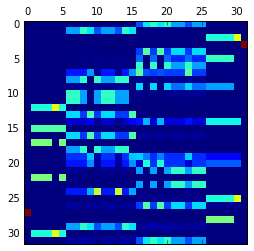

In [189]:
alph2Sz, Sz2alph = hm.permutations(L)
diag = vecsH.T
diag = vecsH.T[alph2Sz]
diag = diag[:,alph2Sz]
plt.matshow(np.absolute(diag))